# Importación de datos

## Descargar dataset

Fuente: https://archive.ics.uci.edu/ml/datasets/automobile

Datos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Atributos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

In [1]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

## Asignar dataset

El dataset contiene información sobre 205 automóviles y sus precios, aunque
no incluye los nombres de las columnas; esta información se encuentra en un archivo adicional. Concretamente, el dataset contiene:

i) información de un automóvil en términos de diversas características, 

ii) su nivel de riesgo en relación con el seguro, y

iii) el pago medio relativo de los siniestros ocurridos por año de seguro. 

Finalmente, cada fila del dataset contiene información sobre el precio por el que se vendió dicho vehículo. Esta sera la variable objetivo.

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Nombre de los atributos

Se ha sustituido el guión normal por el guión bajo en los nombres de los atributos.

In [3]:
feature_names = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price'
]

# Cargar el dataset desde archivo

In [4]:
# los valores desconocidos en el dataset están marcados con una interrogación
df = pd.read_csv(
    '/content/datasets/imports-85.data',
    names = feature_names,
    na_values = '?'
)

# Explorar el dataset

In [5]:
print(len(df))

205


In [6]:
df.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [7]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

# Preparación de los datos

#### Function `print_cols_with_missing_values`

In [8]:
def cols_with_missing_values(df):
  df_with_missing = df.isnull().sum()
  return df_with_missing[df_with_missing > 0]

Una vez importado el dataset, empezaremos identificando y corrigiendo
aquellos valores que falten en las filas. Para ello, primero identificaremos qué propiedades son las que presentan dichos valores utilizando el método isnull() del dataframe para filtrar por aquellas columnas que tengan al menos una celda sin valor.

In [9]:
df_temp = cols_with_missing_values(df)
df_temp

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

#### Replacing NaN, Na, NA values by column mean

In [10]:
# a los atributos normalized_losses, bore, stroke, horsepower y peak_rpm
# se les deben sustituir los valores nan por la media de la columna
features_to_be_replaced = [
    'normalized_losses',
    'bore',
    'stroke',
    'horsepower',
    'peak_rpm'
]
foo = [df[f].fillna(df[f].mean(), inplace=True) for f in features_to_be_replaced]     

Checking again NULL values in <normalized_losses, bore, stroke, horsepower, peak_rpm>

In [11]:
df_temp = cols_with_missing_values(df)
df_temp

num_of_doors    2
price           4
dtype: int64

#### Replacing NaN, Na, NA values by column mode

In [12]:
# al atributo num_doors se le debe sustituir los valores nan por la mode de la
# columna
df['num_of_doors'].replace(
    to_replace=np.NAN,
    value=df.num_of_doors.mode().values[0],
    inplace=True
)

Checking again NULL values in `num_of_doors`

In [13]:
print(f'Número total de valores nulos: <{df.num_of_doors.isna().sum()}>')
print('-------------------------------------')
print(df.num_of_doors[df.num_of_doors.isna()])
print('-------------------------------------')
df_temp = cols_with_missing_values(df)
df_temp

Número total de valores nulos: <0>
-------------------------------------
Series([], Name: num_of_doors, dtype: object)
-------------------------------------


price    4
dtype: int64

In [14]:
# el atributo price también incluye algunos valores nulos, en este caso, y dado
# que se trata de la variable objetivo, no hay mucho que se pueda hacer,
# por lo que simplemente se eliminan las filas sin precio
before = len(df)
print(f'Número de filas antes de quitar los NAN: <{before}>')
df.dropna(inplace=True)
after = len(df)
print(f'Número de filas después de quitar los NAN: <{after}>')
print('-------------------------------------')
print(f'Se han eliminado: <{before - after}> filas.')

Número de filas antes de quitar los NAN: <205>
Número de filas después de quitar los NAN: <201>
-------------------------------------
Se han eliminado: <4> filas.


In [15]:
# después de borrar filas es conveniente resetear el índice del dataframe
df.reset_index(drop = True, inplace = True)

Checking again about missing values (na, NA, NaN, null...)

In [16]:
print(f'Número total de valores nulos: <{df.isna().sum().sum()}>')
print('-------------------------------------')
df_temp = cols_with_missing_values(df)
df_temp

Número total de valores nulos: <0>
-------------------------------------


Series([], dtype: int64)



---



---



# Pre-proceso

### Separación de atributos en numéricos, categóricos y variable objetivo

In [17]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_feature_names = [
    'symboling',
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'  
]

categorical_feature_names = [
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location'
    'engine_type',
    'num_of_cylinders',
    'fuel_system'
]

all_feature_names = numeric_feature_names + categorical_feature_names

target = 'price'

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')
print(f'Propiedad objetivo: {target}')

Propiedades numéricas: ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'] (15)
Propiedades categóricas: ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_locationengine_type', 'num_of_cylinders', 'fuel_system'] (9)
Propiedad objetivo: price


### Histograma de los atributos

<ipython-input-18-490db72d8d39>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>, <AxesSubplot:>]],
      dtype=object)

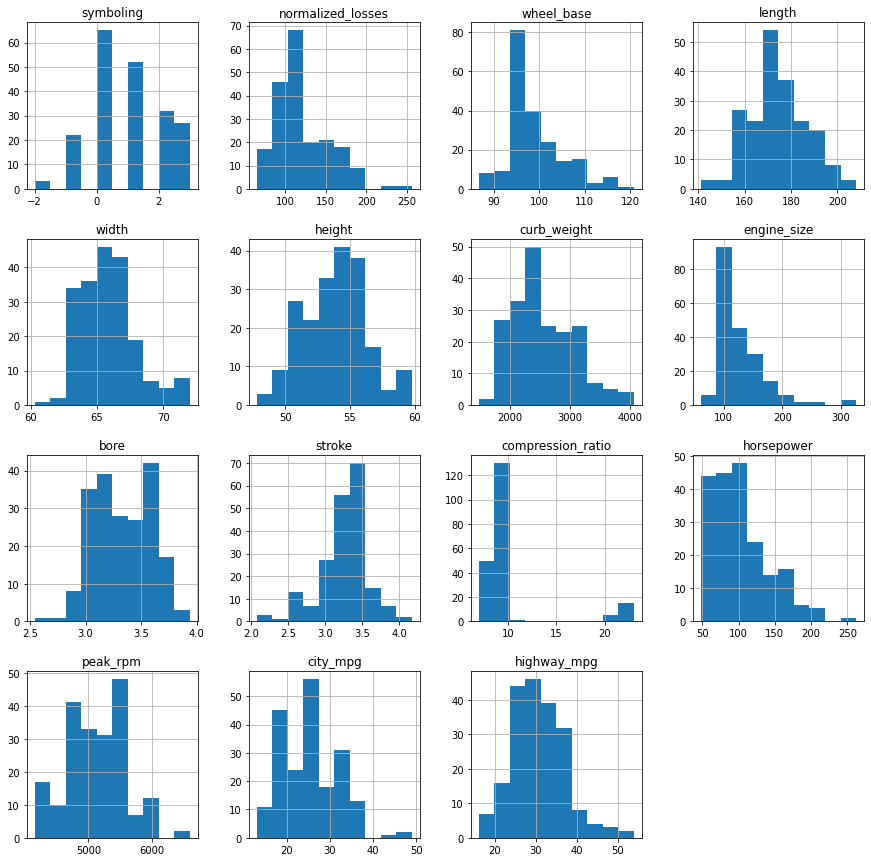

In [18]:
# se comienza el análisis examinando los histogramas de las
# propiedades numéricas para tener una visión general de las distribuciones
import matplotlib.pyplot as plt
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

De estos histogramas podemos identificar varias desviaciones positivas (p. ej.,
normalized-losses o engine-size) ocasionadas por algunos valores atípicos. Para
mejorar las distribuciones, se procede a aplicar algunas transformaciones a
aquellas propiedades que presentan valores atípicos extremos.

En primer lugar, se tendrá qué identificar cuáles son esos valores atípicos extremos. Para ello, podemos utilizar los diagramas de cajas (boxplots) para visualizarlos y confirmar que existen. Para dibujarlos, podemos hacerlo fácilmente utilizando la biblioteca seaborn.

### Funciones para el pre-proceso

Function `draw_hist_boxplot`

In [19]:
import seaborn as sns

# mediante esta función de pueden visualizar los 'outliers'
def draw_hist_boxplot(df, feature_name):
  # se dibuja el diagrama de cajas
  sns.boxplot(x = feature_name, data = df)
  # se dibujan sobre el diagrama todos los puntos de datos que tiene la propiedad
  sns.stripplot(x = feature_name, data = df, color = "#474646")

Function `replace_outliers`

In [20]:
# mediante esta función se reemplazan todos los outliers
# cualquier valor por encima o por debajo de los
# límites superior o inferior es sustituido por la mediana
def replace_outliers(df, feature_name, statistic):
    if statistic == 'median': VALUE = df[feature_name].quantile(0.5)
    elif statistic == 'mean': VALUE = df[feature_name].mean()
    else: raise ValueError('Wrong <statistic> input: <mean> or <median> values allowed')
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                    VALUE, 
                                    df[feature_name])

### Atributo `normalized_losses`

Mostrar los outliers con Boxplot

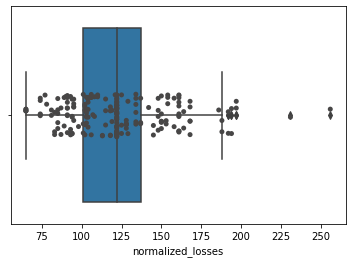

In [21]:
# se dibuja el diagrama y los puntos, se observa que no hay outliers
draw_hist_boxplot(df, 'normalized_losses')

In [22]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
print(df['normalized_losses'].skew())

0.8465463512727495


Sutituir los outliers de `normalized_losses` por un valor estadístico

In [23]:
# Replacing outliers in <normalized_losses> feature by median
# ------------------------------------------------------------
replace_outliers(df, 'normalized_losses', 'median')

Mostrar los outliers (otra vez) con Boxplot

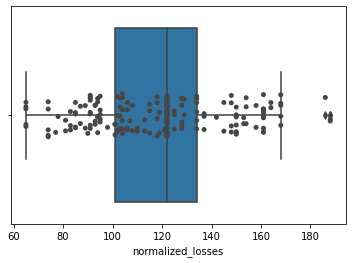

In [24]:
draw_hist_boxplot(df, 'normalized_losses')

Mostrar el histograma

<AxesSubplot:>

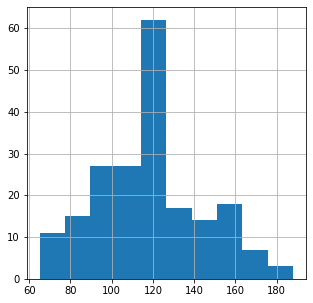

In [25]:
# reemplazar outliers de stroke y volver a dibujar
df['normalized_losses'].hist(ax = plt.figure(figsize = (5, 5)).gca())

In [26]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
print(df['normalized_losses'].skew())

0.2551782989144891


### Atributo `stroke`

Mostrar los outliers con Boxplot

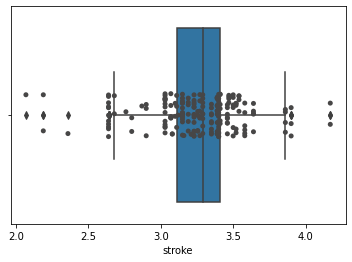

In [27]:
# dibujar atributo stroke
draw_hist_boxplot(df, 'stroke')

In [28]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
print(df['stroke'].skew())

-0.7003960287260405


Sutituir los outliers de `stroke` por un valor estadístico

In [29]:
# Replacing outliers in <normalized_losses> feature by median
# ------------------------------------------------------------
replace_outliers(df, 'stroke', 'median')

Mostrar los outliers (otra vez) con Boxplot

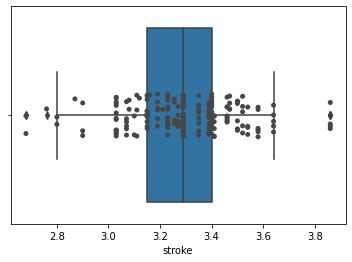

In [30]:
draw_hist_boxplot(df, 'stroke')

In [31]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
print(df['stroke'].skew())

-0.16282576627680126


Mostramos el histograma de la variable

<AxesSubplot:>

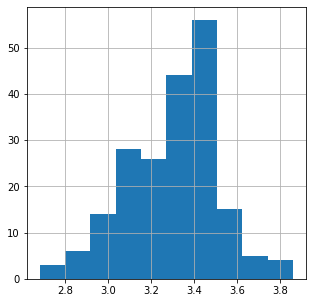

In [32]:
# reemplazar outliers de stroke y volver a dibujar
df['stroke'].hist(ax = plt.figure(figsize = (5, 5)).gca())

### Atributo `city_mpg`

Mostrar los outliers con Boxplot

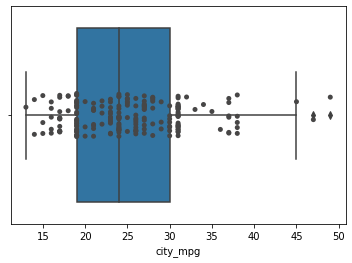

In [33]:
# atributo city-mpg
draw_hist_boxplot(df, 'city_mpg')

Número de filas del DataFrame ***antes*** de eliminar de `city_mpg` las filas que contienen outliers.

In [34]:
print(len(df))

201


> En la propiedad `city-mpg` podemos ver cómo sólo hay algunos pocos valores atípicos. 

> Simplemente los eliminaremos del conjunto de datos.

In [35]:
# Por inspección visual determinamos que
VALOR_OUTLIER = 45

# Eliminamos las filas cuyo atributo <city_mpg> tenga un valor
# superior a VALOR_OUTLIER
df.drop(df.loc[df['city_mpg'] > VALOR_OUTLIER].index, inplace = True)

Número de filas del DataFrame ***después*** de eliminar de `city_mpg` las filas que contienen outliers.

In [36]:
print(len(df))

199


Mostramos el histograma de la variable

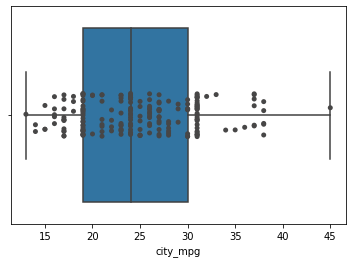

In [37]:
draw_hist_boxplot(df, 'city_mpg')

In [38]:
# repetir para los todos los atributos numéricos:
# compression-ratio, engine-size, peak-rpm, horsepower, etc.

### Tratamiento de los outliers en el resto de atributos

Tras una inspección visual con `Boxplot` se determinó que existen/existían valores atípicos en los siguientes atributos.

In [39]:
features_with_outliers = [
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'curb_weight',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'
]

De todos estos atributos ya se ha trabajado sobre las variables:
* `normalized_losses`
* `stroke`
* `city_mpg`

Nueva lista de características sobre las que sustituir los outliers

In [40]:
features_with_outliers = [
    # 'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'curb_weight',
    # 'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    # 'city_mpg',
    'highway_mpg'
]

Se sustituye los outliers por el valor estadístico de la media artimética

In [41]:
# Replacing outliers over all features by median statistic
# --------------------------------------------------------
for cols in features_with_outliers:
    replace_outliers(df, cols, 'mean')

Una vez que hayamos finalizado, podemos volver a visualizar los ***histogramas***
para ver que aspecto tienen las nuevas distribuciones.

<ipython-input-42-6e33b9c7fa88>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>, <AxesSubplot:>]],
      dtype=object)

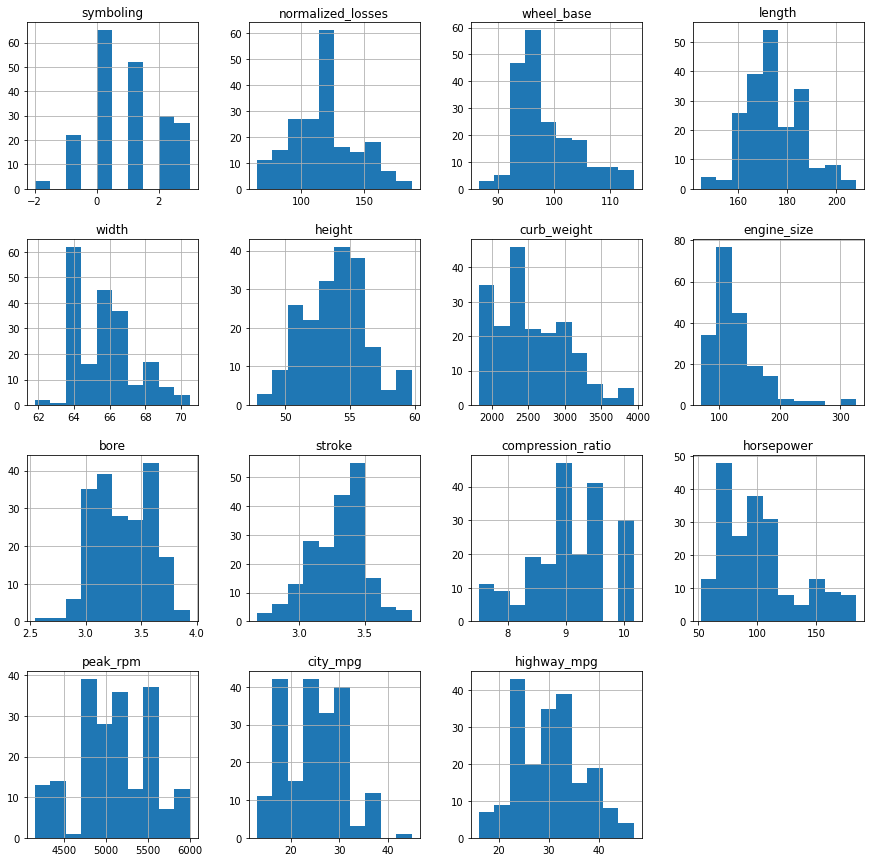

In [42]:
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

> En las gráficas puede observarse cómo las desviaciones se han reducido ligeramente y ya no existen valores atípicos extremos. 

### Normalización de datos

> Para los valores atípicos que nos queden, podemos aplicar la técnica de normalizado mediante escalado. 

>Para ello, podemos utilizar la clase `StandardScaler` del módulo sklearn.preprocessing y visualizar de nuevo los histogramas para revisar las nuevas distribuciones.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])

<ipython-input-44-6e33b9c7fa88>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>, <AxesSubplot:>]],
      dtype=object)

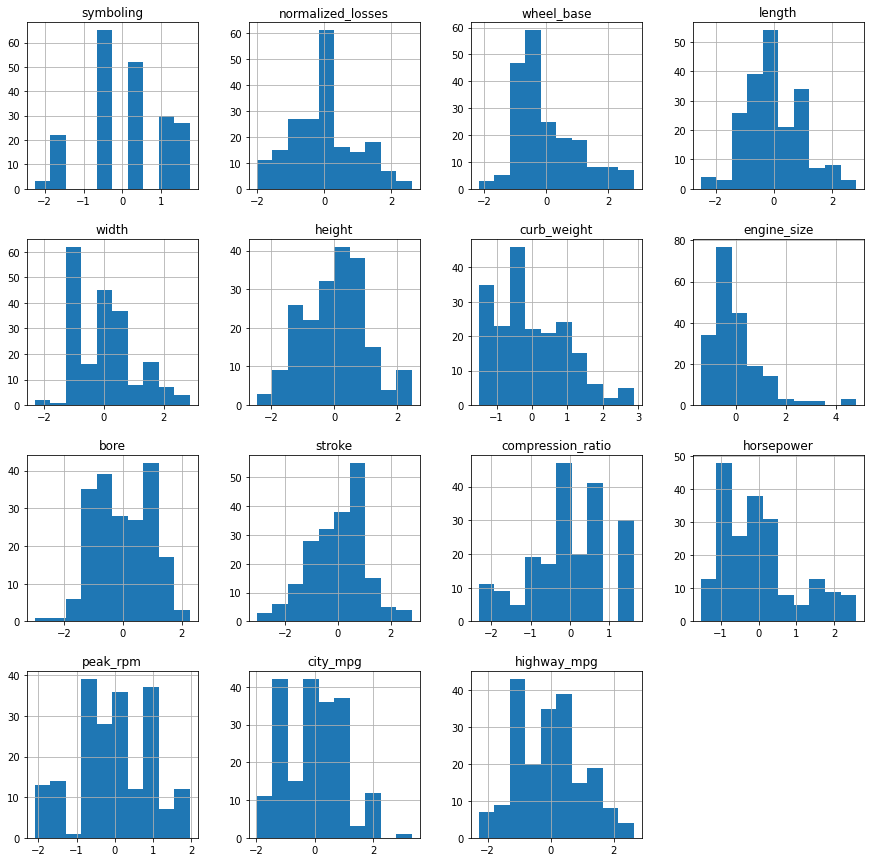

In [44]:
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())



---



# Importancia de las propiedades y división del conjunto de datos

Vamos a analizar ahora el impacto de las propiedades sobre la variable objetivo. Para ello, vamos a empezar por las propiedades numéricas. Podemos realizar este análisis inicial mediante un mapa de calor que muestre las correlaciones que existen entre todas las variables, utilizando el método heatmap() del módulo seaborn e indicando que utilice la correlación de Pearson para ello.

<AxesSubplot:>

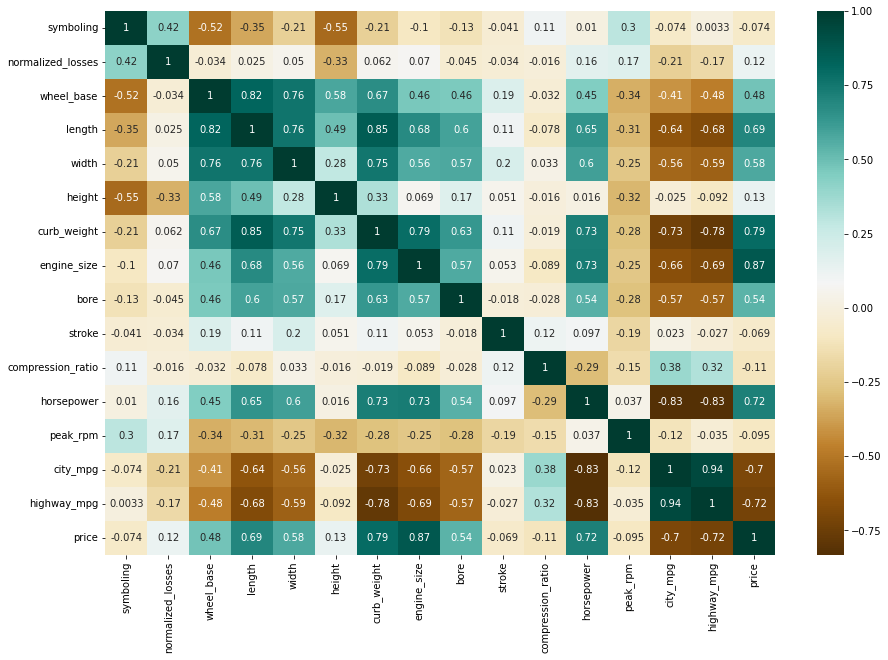

In [45]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)

In [46]:
# Número de atributos ANTES de eliminar <symboling>
len(df.columns)

26

In [47]:
# podemos utilizar el análisis para eliminar algunas propiedades que no
# tengan ninguna correlación con la variable objetivo: symboling
df.drop(columns=['symboling'], inplace=True)

In [48]:
# Número de atributos DESPUÉS de eliminar <symboling>
len(df.columns)

25

### Correlación entre vaiable objetivo y atributos categóricos

Sobre las variables categóricas, se pueden visualizar sus diagramas de cajas
para analizar sus distribuciones en relación al precio.

<AxesSubplot:xlabel='body_style', ylabel='price'>

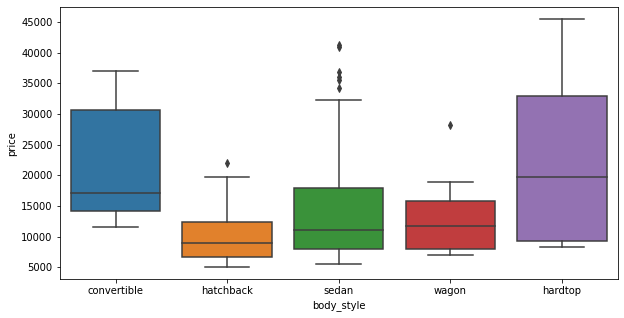

In [49]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'body_style', y = 'price', data = df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

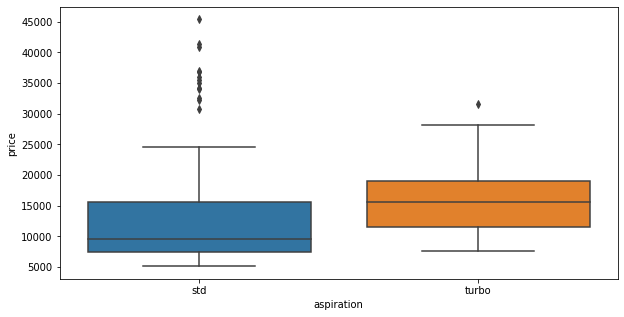

In [50]:
# aspiration
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'aspiration', y = 'price', data = df)

<AxesSubplot:xlabel='fuel_system', ylabel='price'>

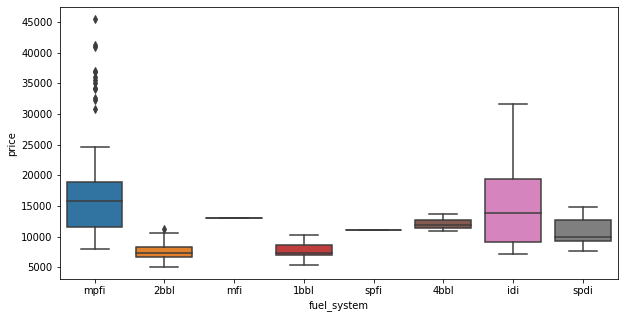

In [51]:
# fuel_system
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fuel_system', y = 'price', data = df)

<AxesSubplot:xlabel='drive_wheels', ylabel='price'>

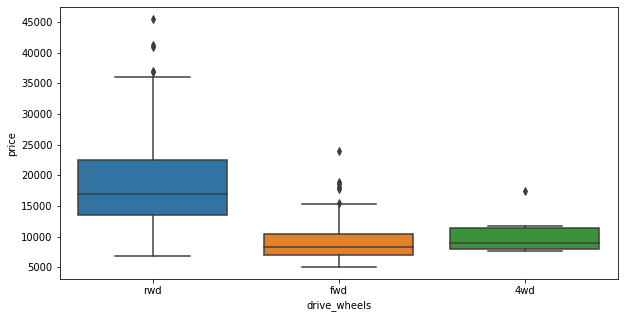

In [52]:
# drive_wheels
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drive_wheels', y = 'price', data = df)

### Separación entre atributos numéricos, categóricos y variable objetivo

Una vez se hayan analizado las distintas propiedades, fijaremos las propiedades con las que entrenaremos el modelo y procederemos a la división del conjunto de datos en los conjuntos de entrenamiento, validación y pruebas.

In [53]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_feature_names = [
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'  
]

categorical_feature_names = [
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'num_of_cylinders',
    'fuel_system'
]

all_feature_names = numeric_feature_names + categorical_feature_names

target = 'price'

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')
print(f'Propiedad objetivo: <{target}>')
print(f'----------------------------------------------------------------------')
print(f'Número de atributos que se incluirán en el estudio:', end=' ')
print(f'<{len(all_feature_names)}>')

Propiedades numéricas: ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'] (14)
Propiedades categóricas: ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system'] (10)
Propiedad objetivo: <price>
----------------------------------------------------------------------
Número de atributos que se incluirán en el estudio: <24>


In [54]:
df[numeric_feature_names].head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,0.130509,-1.820288,-0.478688,-0.939212,-2.039,-0.004488,0.063374,0.509006,-3.073377,-0.103617,0.308033,-0.229631,-0.656758,-0.534705
1,0.130509,-1.820288,-0.478688,-0.939212,-2.039,-0.004488,0.063374,0.509006,-3.073377,-0.103617,0.308033,-0.229631,-0.656758,-0.534705


In [55]:
df[categorical_feature_names].head(2)

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


### Transforming categorical features by `LabelEncoder`

In [56]:
# Before encoding
df.head(1)

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.130509,alfa-romero,gas,std,two,convertible,rwd,front,-1.820288,-0.478688,...,0.063374,mpfi,0.509006,-3.073377,-0.103617,0.308033,-0.229631,-0.656758,-0.534705,13495.0


In [57]:
le = LabelEncoder()

for cat in categorical_feature_names:
    le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    print(le.classes_)

# le.inverse_transform()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['diesel' 'gas']
['std' 'turbo']
['four' 'two']
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
['4wd' 'fwd' 'rwd']
['front' 'rear']
['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
['eight' 'five' 'four' 'six' 'twelve' 'two']
['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


In [58]:
# After encoding
df.head(1)

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.130509,0,1,0,1,0,2,0,-1.820288,-0.478688,...,0.063374,5,0.509006,-3.073377,-0.103617,0.308033,-0.229631,-0.656758,-0.534705,13495.0


# Separación de los datos para ***entrenamiento*** y ***validación/prueba***

In [59]:
from sklearn.model_selection import train_test_split

X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size = 0.2, random_state = 1)
X_train, X_val = train_test_split(X_train_full, test_size = 0.33, random_state = 1)

y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis = 1, inplace = True)
X_val.drop([target], axis = 1, inplace = True)
X_test.drop([target], axis = 1, inplace = True)

X_train.head(2)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
142,-1.109797,-0.296172,-0.085091,-0.165764,-0.320887,-0.534799,-0.469165,1.074231,-0.034836,-0.103617,...,18,1,0,0,4,1,0,3,2,1
35,-1.523232,-0.386893,-1.458495,-1.058204,1.847208,-1.081553,-0.856467,-1.563487,0.562910,0.192598,...,5,1,0,0,4,1,0,2,2,0


# Modelo basado en una red neuronal con `Keras`

In [60]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Bibliotecas para Redes Neuronales

In [61]:
# -------------------------------------------------------
# TensorFlow Keras
from keras.models import Sequential
from keras.metrics import MeanRelativeError
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from scikeras.wrappers import KerasRegressor
# -------------------------------------------------------
# Scikit-Learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
# -------------------------------------------------------
# Vario
from numpy import loadtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statistics import mean
# -------------------------------------------------------

## Definir el optimizador del modelo (para Red Neuronal)

In [62]:
# from keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

## LearningRateScheduler

Decreasing learning rate over epochs

In [63]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.25
    epochs_drop = 128
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Definir el modelo

Número de atributos presentes en el dataset de entrenamiento

In [64]:
len(X_train.columns)

24

### Resumen de características del modelo, funciones de entrenamiento y funciones de evaluación

* Creamos un modelo de Red Neuronal de tipo secuencial con tres capas:
>> * Una capa de entrada con `24` nodos (uno por cada variable de entrada)
>> * Dos capas ocultas (intermedias) de `48` nodos cada uno. Este número hay que escogerlo bien por intuición o bien a base de prueba y error.
>> * Una capa de salida formada por un nodo.

* Función de activación para las capas de entradas e intermedias: `Rectified Linear Unit` (ReLU). Esta función es, a día de hoy, la más popular para definir el modelo en las capas de entrada y ocultas por la mejora en el rendimiento del modelo, buena tasa de aprendizaje y porque evita el efecto de `vanishing gradient problem` cuando el modelo tiene un número elevado de capas.

* Función de activación para la capa de salida: al tratarse de un problema de regresión queremos trabajar directamente con los datos de salida sin que haya que transformarlos.

* Función de pérdida: `mean_squared_error`.

* Función de optimización: `Adam` con tasa de aprendizaje decreciente.

* Métrica para medir la precisión del modelo: `mean squared error`. 

* Estimador: `Keras regressor`. See [Scikeras](https://pypi.org/project/scikeras/) for further information.

* Validación cruzada con `K-Fold`

* Función de evaluación: [Cross_val_score ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) de Scikit-Learn. Esta función utilizará la métrica de evaluación `neg_mean_squared_error` para calcular la precisión del modelo. Adicionalmente podemos cambiar el error cuadrático medio por el coeficiente de determinación `r2` para obtener un valor más intuitivo (parecido a un porcentaje)

### Baseline model function

In [65]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(48, input_shape=(24,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(48, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(
        loss = 'mean_squared_error',
        optimizer = optimizer
    )
    return model

### Setting the model's estimator: `KerasRegressor`

In [66]:
# define the keras model
estimator = KerasRegressor(
    model =baseline_model,
    epochs = 1000,
    batch_size = 24,
    verbose = 0
)

### Train and evaluate model: `cross_val_score`

In [ ]:
# Computing time: 1 min.

In [67]:
cv = KFold(n_splits = 10)
results = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv = cv,
    scoring = 'neg_mean_squared_error'
)

### Model's accuracy computed by cross-validation
--------------------------------------------------
The mean squared error is negative because scikit-learn inverts so that the 
metric is maximized instead of minimized. 
You can ignore the sign of the result.

In [74]:
print(f'---------------------------------------------------------')
print("Results: %.2f MSE ## %.2f Std" % (results.mean(), results.std()))
print(f'---------------------------------------------------------')
rmse = pow(abs(results.mean()), 0.5)
print(f'Rooted MSE: <{round(rmse, 4)}>')
print(f'---------------------------------------------------------')

---------------------------------------------------------
Results: -17224861.36 MSE ## 12674255.70 Std
---------------------------------------------------------
Rooted MSE: <4150.2845>
---------------------------------------------------------


## Split ***train*** and ***test*** data

In [75]:
from sklearn.model_selection import train_test_split

# Train data            >>  X_train_full
# Test/validation data  >>  X_val_full 

df_train_full, df_val_full = train_test_split(
    df[all_feature_names + [target]],
    test_size = 0.25,
    random_state = 0
)

Data for building final model

In [76]:
X = df_train_full.drop([target], axis = 1, inplace = False)
y = df_train_full[target]
# ----------------------------------------------------------
X_val = df_val_full.drop([target], axis = 1, inplace = False)
y_val = df_val_full[target]

## Second (and defenitive) attempt: training with `fit`

---



### Baseline model function

> * [Keras Sequential Model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

In [77]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(48, input_shape=(24,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(48, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(
        loss = 'mean_squared_error',
        optimizer = optimizer,
        metrics = ['mse', 'mae']
        # ['mse' | 'accuracy' | 'mae' | 'acc']
    )
    return model

### Train and evaluate model: `fit` and validation data

In [110]:
# Computing time: 5 mins.

In [109]:
model = baseline_model()

results = list()

cv = KFold(n_splits = 5)
for train, test in cv.split(df_train_full):
    # ------------------------------------
    X_train = df_train_full.iloc[train]
    X_train = X_train.drop([target], axis = 1, inplace = False)
    X_test = df_train_full.iloc[test]
    X_test = X_test.drop([target], axis = 1, inplace = False)
    y_train = df_train_full[target].iloc[train]
    y_test = df_train_full[target].iloc[test]
    # ------------------------------------
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_test, y_test),
        epochs = 1000,
        batch_size = 48,
        verbose = 0,
        callbacks=[lr_scheduler]
    )
    # ------------------------------------
    _ = model.get_metrics_result()
    results.append(_['mse'].numpy())      

### Displaying model's metric values

In [111]:
print(f'---------------------------------------------------------')
print('Mean of MSE:\u0009%.2f' % (mean(results)))
rmse = pow(abs(mean(results)), 0.5)
print(f'Rooted MSE:\u0009{round(rmse, 4)}') 
print(f'---------------------------------------------------------')

---------------------------------------------------------
Mean of MSE:	19137998.00
Rooted MSE:	4374.6998
---------------------------------------------------------


In [112]:
_, mse, mae = model.evaluate(X_val, y_val)
print('Loss:\u0009\u0009%.2f' % (_))
print('MSE:\u0009\u0009%.2f' % (mse))
print('MAE:\u0009\u0009%.2f' % (mae))
rmse = pow(abs(mse), 0.5)
print(f'Rooted MSE:\u0009{round(rmse, 4)}') 

2/2 [==============================] - 0s 7ms/step - loss: 15350108.0000 - mse: 15350108.0000 - mae: 2592.1030
Loss:		15350108.00
MSE:		15350108.00
MAE:		2592.10
Rooted MSE:	3917.9214


## Building final model

### LearningRateScheduler

Decreasing learning rate over epochs

In [113]:
# Library required:
# -----------------
# from keras.callbacks import LearningRateScheduler

# Decreasing Neural Network learning rate over epochs
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.25
    epochs_drop = 128
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

### Baseline model function

> * [Keras Sequential Model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

`Loss` ***Parameter***
> * [Keras Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

`Metrics` ***Parameter***
> * [Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


In [114]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(
        Dense(48,
        input_shape=(X_val.shape[1],),
        kernel_initializer='normal',
        activation='relu'
        ))
    model.add(Dense(48,
        kernel_initializer='normal',
        activation='relu'
    ))
    model.add(Dense(1,
        kernel_initializer='normal'
    ))
    # Compile model
    model.compile(
        loss = 'mean_squared_error',
        optimizer = optimizer,
        metrics = ['mse', 'mae']
        # ['mse' | 'accuracy' | 'mae' | 'acc']
    )
    return model

### Train and evaluate model: `fit` and validation data

In [115]:
# Entrenar el modelo
model = baseline_model()

cv = KFold(n_splits=5)

history = model.fit(
    X,
    y,
    validation_data = (X_val, y_val),
    epochs = 1000,
    batch_size = None,
    verbose = 'auto',
    callbacks=[lr_scheduler]
)

Epoch 1/1000
5/5 [==============================] - 1s 74ms/step - loss: 232680448.0000 - mse: 232680448.0000 - mae: 13078.8857 - val_loss: 251153408.0000 - val_mse: 251153408.0000 - val_mae: 13619.4805 - lr: 0.0100
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 213593664.0000 - mse: 213593664.0000 - mae: 12413.6338 - val_loss: 189872336.0000 - val_mse: 189872336.0000 - val_mae: 11353.1387 - lr: 0.0100
Epoch 3/1000
5/5 [==============================] - 0s 17ms/step - loss: 122880960.0000 - mse: 122880960.0000 - mae: 8237.5596 - val_loss: 59374100.0000 - val_mse: 59374100.0000 - val_mae: 5445.6436 - lr: 0.0100
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 54109064.0000 - mse: 54109064.0000 - mae: 5995.1533 - val_loss: 62132980.0000 - val_mse: 62132980.0000 - val_mae: 7158.2402 - lr: 0.0100
Epoch 5/1000
5/5 [==============================] - 0s 15ms/step - loss: 48061688.0000 - mse: 48061688.0000 - mae: 5702.4053 - val_loss: 42532992.

### Model's history

In [118]:
loss = mean(history.history['loss'])
print(f'LOSS: {loss}')
print(f'---------------------------------------------------------')
mse = mean(history.history['mse'])
print(f'MSE: {mse}')
print(f'---------------------------------------------------------')
mae = mean(history.history['mae'])
print(f'MAE: {mae}')
print(f'---------------------------------------------------------')
rmse = pow(abs(mse), 0.5)
print(f'Rooted MSE: {round(rmse, 4)}') 

LOSS: 3930522.56025
---------------------------------------------------------
MSE: 3930522.56175
---------------------------------------------------------
MAE: 1368.385601928711
---------------------------------------------------------
Rooted MSE: 1982.5546


### Model's accuracy: `evaluate` and validation data

> * [en.wikipedia.org RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)


In [120]:
# evaluate the keras model
score = model.evaluate(X_val, y_val, return_dict=True)
print(f'---------------------------------------------------------')
print('LOSS: %.2f' % (score['loss']))
print(f'---------------------------------------------------------')
print('MSE: %.2f' % (score['mse']))
print(f'---------------------------------------------------------')
print('MAE: %.2f' % (score['mae']))
print(f'---------------------------------------------------------')
rmse = pow(abs(score['mse']), 0.5)
print(f'RMSE: {round(rmse, 4)}')
print(f'---------------------------------------------------------')
y_norm = y_val.max() - y_val.min()
rmse = pow(abs(score['mse']), 0.5)
nrmse = rmse / y_norm
print(f'NRMSE: {round(nrmse, 4)}')
print(f'---------------------------------------------------------')
Q1 = y_val.quantile(0.25)
Q3 = y_val.quantile(0.75)
IQR = Q3 - Q1
rmseiqr = rmse / IQR
print(f'RMSEIQR: {round(rmseiqr, 4)}')
print(f'---------------------------------------------------------')

2/2 [==============================] - 0s 7ms/step - loss: 13067684.0000 - mse: 13067684.0000 - mae: 2475.7273
---------------------------------------------------------
LOSS: 13067684.00
---------------------------------------------------------
MSE: 13067684.00
---------------------------------------------------------
MAE: 2475.73
---------------------------------------------------------
RMSE: 3614.9252
---------------------------------------------------------
NRMSE: 0.1141
---------------------------------------------------------
RMSEIQR: 0.3758
---------------------------------------------------------


### Getting predictions with validation data

In [121]:
y_pred = model.predict(
    X_val,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

2/2 [==============================] - 0s 5ms/step


### Compute `Mean Realtive Error`:

> * [MeanRelativeError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanRelativeError)

In [123]:
metric = MeanRelativeError(normalizer = y_pred)
metric.update_state(y_pred, y_val)
mre = metric.result().numpy()
mre = round(mre, 6)
print('Mean Relative Error: %.2f' % mre)

Mean Relative Error: 0.20




---



---



## Visualización de resultados

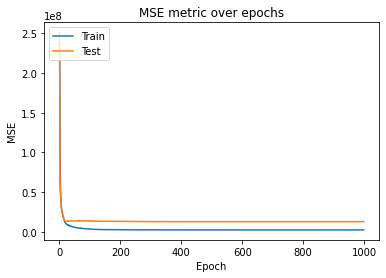

In [124]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE metric over epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

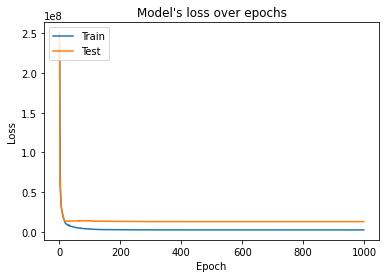

In [125]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss over epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

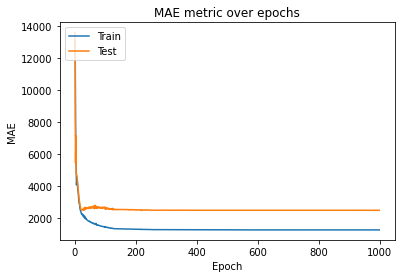

In [126]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title("MAE metric over epochs")
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Visualización del modelo
Para visualizar el modelo y sus neuronas con matplotlib podemos utilizar la función plot_model de Keras, que nos permite generar una imagen del modelo. Además, también podemos utilizar la librería pyplot de matplotlib para visualizar la estructura del modelo y sus neuronas.

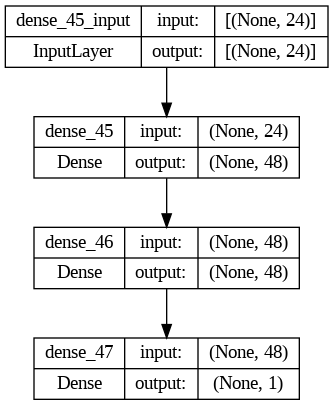

In [127]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Esto generará una imagen del modelo en un archivo llamado "model.png" y mostrará las formas y nombres de las capas.

Para visualizar la estructura del modelo y sus neuronas utilizando pyplot, podemos hacer lo siguiente:

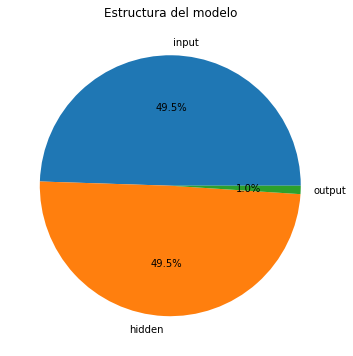

In [128]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
# layer_names = [layer.name for layer in model.layers]

layer_names = ['input', 'hidden', 'output']

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()



---



## Resultados:

Definitive parameters list
---

PARÁMETROS

> * Learning_rate = `0.01`

> * Initial_lr = `0.01`

> * Drop = `0.25`

> * Epochs_drop = `128`

> * Second layer (input) = `48` (input variable shape = 24)

> * Second layer (hidden) = `48`

> * Output layer = `1` without activaton function

> * Batch size = `Auto` (None)

> * Epochs = `1000`

> * Loss = `'mean_squared_error'`

> * Metric = `'mean_squared_error | mean squared error'`

---

***SCORE LIST***

```python
---------------------------------------------------------
LOSS: 13067684.00
---------------------------------------------------------
MSE: 13067684.00
---------------------------------------------------------
MAE: 2475.73
---------------------------------------------------------
RMSE: 3614.9252
---------------------------------------------------------
NRMSE: 0.1141
---------------------------------------------------------
RMSEIQR: 0.3758
---------------------------------------------------------
```